<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jesusrincon1328/blob/main/Data%20Analysis%20with%20Python/Module_4_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Analysis with Python**

**Alumno:** Jesús Angel Rincón Ruiz

**Matricula:** A01793960

**Módulo 4 - Model Development**

**Objetivos**

Desarrollo de modelos predictivos.

En esta seccion vamos a desarrollar diferentes modelos que van a predecir el precio de un carro utilizando las variables o features.

En el análisis de datos, usualmente utilizamos "Model Development" para ayudarnos a predecir futuras observaciones a partir de los datos que tenemos.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [4]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>

**Simple Linear Regression**

Es un metodo que nos ayuda a entender la relación entre dos variables


*   El predictor/variable independiente(X)
*   La respuesta/variable dependiente(lo que queremos predecir)(Y)







In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lm = LinearRegression()
lm

LinearRegression()

In [7]:
X = df[['highway-mpg']]
Y = df['price']

In [8]:
lm.fit(X,Y)

LinearRegression()

In [9]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
lm.intercept_

38423.3058581574

In [11]:
lm.coef_

array([-821.73337832])

Cual es el modelo lineal estimado?

Debemos tener un modelo lineal final con la siguiente estructura:

yhat = a + bX

por lo que tendriamos:

**Price** = 38423.31 - 821.73 x **highway-mpg**

In [12]:
#Crear un objeto de regresion lineal llamado lm1

lm1 = LinearRegression()
lm1

LinearRegression()

In [13]:
#Entrena el modelo utilizando "engine-size" como variable independiente y "price " como variable dependiente.

lm1.fit(df[["engine-size"]], df[["price"]])
lm1

LinearRegression()

In [14]:
#Slope
lm1.coef_


array([[166.86001569]])

In [15]:
#Intercept
lm1.intercept_

array([-7963.33890628])

In [16]:
#equiación predictiva lineal


Price=-7963.34 + 166.86*df['engine-size']

**Multiple Linear Regression**

Y que si queremos predecir el precio de un auto utilizando varias variables?

Podemos utilizar Regresion Lineal Multiple, pero este metodo es utilizado para explicar la relación entre una varable de respuesta(dependendiente) y dos o mas variables predictorias(independientes).


$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$

$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$

La ecuacion seria la siguiente:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$



In [17]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [18]:
lm.fit(Z,df['price'])

LinearRegression()

In [19]:
lm.intercept_

-15806.62462632922

In [20]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Por lo tanto tendremos la funcion lineal de la siguiente manera:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

En el ejemplo, esta seria nuestra funcion?

**Price** = -15678.742628061467 + 52.65851272 x **horsepower** + 4.69878948 x **curb-weight** + 81.95906216 x **engine-size** + 33.58258185 x **highway-mpg**

In [23]:
#crear una Regresion Lineal Multiple "lm2" donde la variable respuesta sea "precio"
#y la variables predictivas sean "normalized-losses" y "highway-mpg".

lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

In [62]:
#encontrar el coeficiente
lm2.coef_

array([   1.49789586, -820.45434016])

# Model Evaluation Using Visualization



In [25]:
import seaborn as sns
%matplotlib inline 

**Regression Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 48161.22809367746)

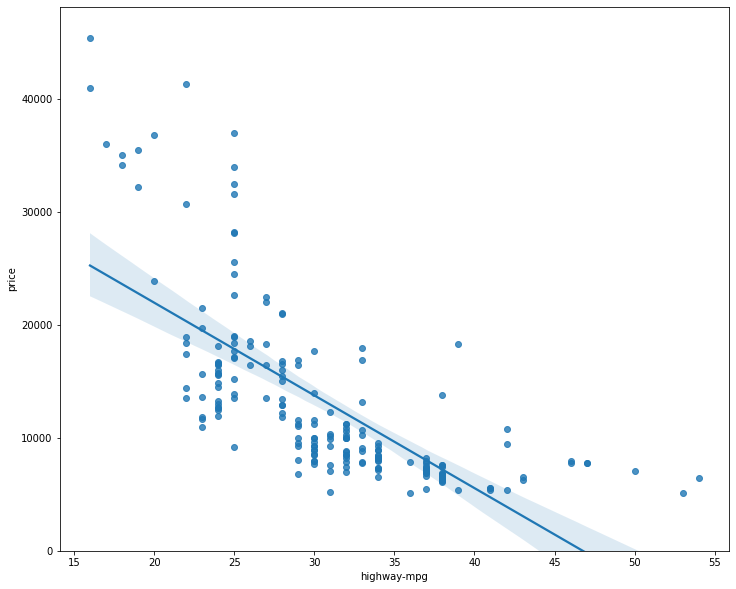

In [27]:
width = 12
height =  10
plt.figure(figsize = (width, height))
sns.regplot('highway-mpg', y='price', data=df)
plt.ylim(0,)

(0.0, 47414.1)

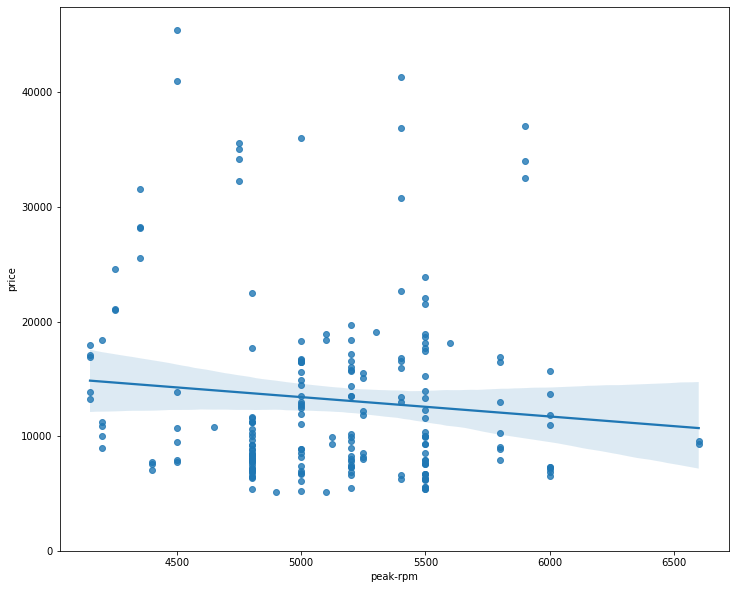

In [29]:
#Regression plot de "peak-rpm"

plt.figure(figsize=(width,heigth))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

Comparando la Regression plot de "peak-rpm" y "higway-mpg", podemos observar que los puntos de "highway-mpg" son mucho mas cercanos a la linea generada y en promedio disminuye.
Los puntos de 'peak-rpm' estan mas dispersos al rededor de la linea predictiva y es mas dificil determinar si los puntos disminuyen o se incrementan cuando "peak-rpm" aumenta.


In [30]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


**Residual Plot**

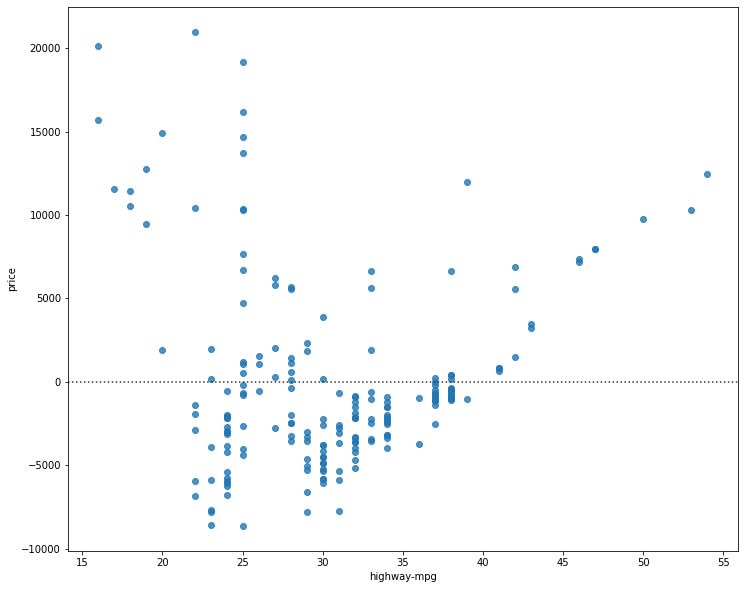

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

**Multiple Linear Regression**

In [32]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


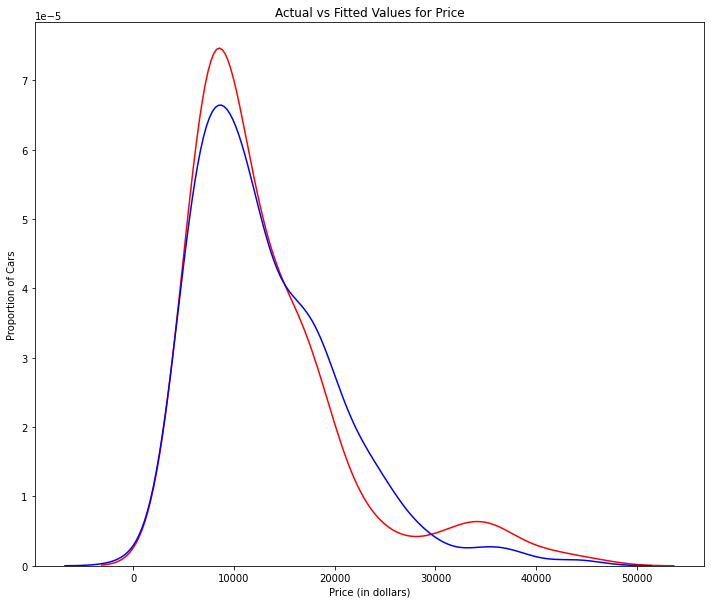

In [33]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

**Polynomial Regression and Pipelines**

In [35]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [36]:
x = df['highway-mpg']
y = df['price']

In [37]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


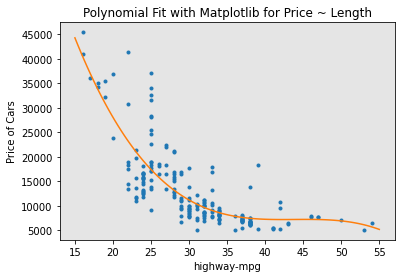

In [38]:
PlotPolly(p, x, y, 'highway-mpg')

In [39]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


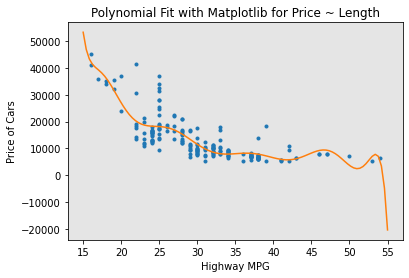

In [40]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [48]:
Z_pr=pr.fit_transform(Z)

In [49]:
Z.shape

(201, 4)

In [50]:
Z_pr.shape

(201, 15)

**Pipeline**

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [57]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [58]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [59]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [60]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

**Measures for In-Sample Evaluation**


Cuando evaluamos nuestros modelos, no solo queremos visualizar los resultados, tambien queremos una medida cuantitativa para determinar que tan preciso es nuestro modelo.

Dos medidas muy importantes que son normalmente usadas en estadistica para determinar la preciosion de un modelo son

*   R^2 / R-squared
*   Mean Squared Error (MSE)

**R-squared**

Tambien conocida como coeffieciente de determinación, es una medida que indica que tan cerca esta el dato a la linea de regresion (fitted regression line)

El valor de R-squared es el pocentaje de variación de la variable de respuesta(y) explicada por el modelo lineal.

**Mean Squared Error (MSE)**

Mide el promedio de los errores cuadrados. Es la diferencia entre el valor actual(y) y el valor estimado(ŷ).

**Model 1: Simple Linear Regression**

In [63]:
#highway_mpg_fit
lm.fit(X, Y)
#encuentra la  R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Podemos decir que cerca del 49.659% de la variación del precio es aplicada por esta simple regresion lineal "hoserpower_fit"



In [64]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


**Model 2: Multiple Linear Regression**

In [67]:
# fit the model 
lm.fit(Z, df['price'])
# encuentra la R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Podemos decir que el 80% de la variación del precio es explicada por la regresion lineal multiple "multi_fit"


In [68]:
Y_predict_multifit = lm.predict(Z)

In [69]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


**Model 3: Polynomial Fit**

In [70]:
from sklearn.metrics import r2_score

In [71]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


**MSE**

In [72]:
mean_squared_error(df['price'], p(x))

20474146.426361218

**5. Prediction and Decision Making**

In [73]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [74]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [75]:
lm.fit(X, Y)
lm

LinearRegression()

In [76]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

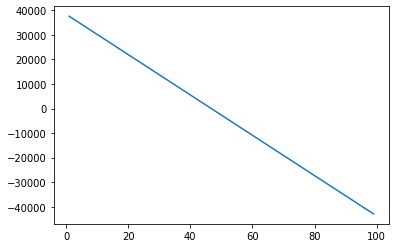

In [77]:
plt.plot(new_input, yhat)
plt.show()

**Decision Making: Determining a Good Model Fit**


Ahora que hemos visualizado los diferentes modelos y generado el R-square y MSE, como podemos determinar el mas adecuado?

•	Cual es un buen valor de R-square?

Cuando comparamos modelos, el modelo que tenga **mayor valor de R-square** es el más adecuado para los datos.


•	Cuales es un buen valor de MSE?

Cuando comparamos modelos, el modelo que tenga **menor valor de MSE** es el más adecuado para los datos.


**Conclusion**

Comparando los tres modelos, concluimos que **el MLR(Multiple Linear Regression) es el mejor modelo** para predecir el precio de nuestro dataset.
Este resultado hace sentido debido a que tenemos 27 variables en total y sabemos que mas de una variable son potenciales predictoras del precio final del automóvil.

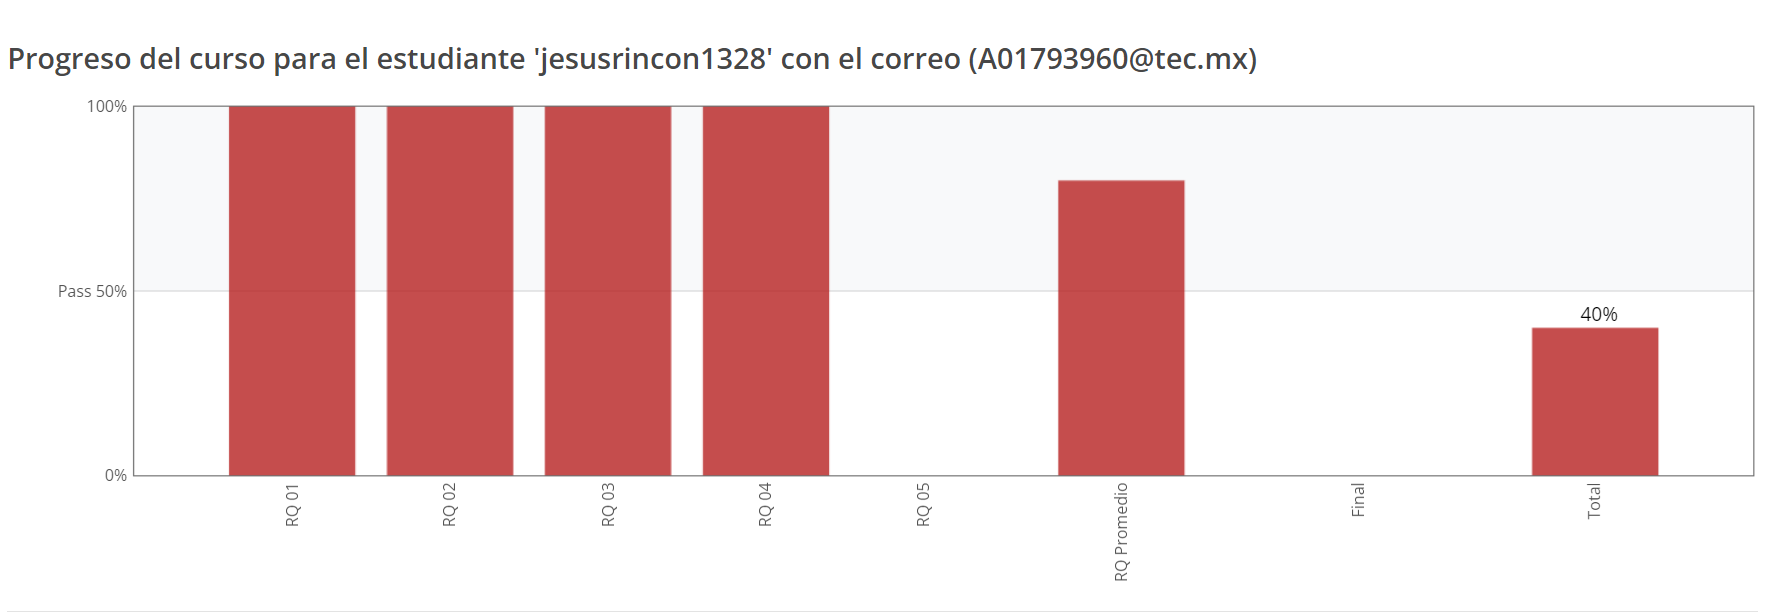